# Exploratory Data Analysis (EDA) Workflow in Pandas

### What is EDA and Why It Matters?

Exploratory Data Analysis (EDA) is the process of deeply investigating datasets to **summarize characteristics**, **detect anomalies**, **identify patterns**, and **form hypotheses**. This step is crucial before any AI/ML modeling because it ensures the **quality and relevance of our data**. Without EDA, we risk:

- Building models on incomplete or biased datasets
- Missing important patterns or relationships
- Feeding incorrect feature formats into algorithms

In the context of the **Titanic dataset**, EDA helps uncover insights like:

- Which passenger groups had the highest survival rates
- How ticket class and fare affected survival
- The impact of missing data on predictive modeling

In **AI/ML pipelines**, EDA helps with:

- **Feature selection** (choosing which columns to use)
- **Data cleaning** (fixing missing values, duplicates, outliers)
- **Preventing data leakage** (avoiding unrealistic performance due to correlated features)

**Step 1 – Understand the Data Structure**

In [1]:
import pandas as pd

df = pd.read_csv("data/train.csv")

# Overview
df.info()
df.head()

# Identify categorical vs numerical columns
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", cat_cols.tolist())
print("Numerical Columns:", num_cols.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


**Purpose:**

- See **column names**, **data types**, **number of non-null values**
- Determine **categorical vs numerical** for appropriate analysis
- Spot possible **data type issues** (e.g., dates stored as strings)

**Step 2 – Univariate Analysis**

Focuses on **one variable at a time**.

In [2]:
# Numeric
print(df['Age'].describe())
print(df['Fare'].describe())

# Categorical
print(df['Survived'].value_counts(normalize=True))
print(df['Sex'].value_counts())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Sex
male      577
female    314
Name: count, dtype: int64


**Purpose:**

- Detect **skewness**, **extreme values**, and **common categories**
- For Titanic, we might see that the median Age is ~28 and survival rate ~38%

**Step 3 – Bivariate & Multivariate Analysis**

Explore relationships between **two or more variables**.

In [3]:
# Bivariate example
pd.crosstab(df['Sex'], df['Survived'], normalize='index')

# Group statistics
df.groupby('Pclass')['Survived'].mean()

# Multivariate
df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

**Purpose:**

- Understand **interactions** between features
- Example: Female passengers had higher survival rates, especially in higher classes

**Step 4 – Outlier Detection**

<Axes: >

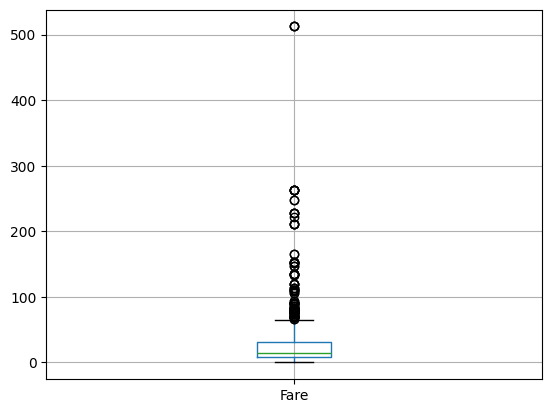

In [4]:
df.boxplot(column='Fare')

**Purpose:**

- Identify **unusually high or low values**
- Outliers can **distort mean/variance** and affect ML models
- In Titanic, a few fares are > 500, which are luxury tickets

**Step 5 – Correlation & Feature Relationships**

In [5]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Detect **high correlations** that may indicate redundancy
- Example: `SibSp` and `Parch` might correlate with `FamilySize` (engineered feature)

**Step 6 – Missing Values Overview**

In [6]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

**Purpose:**

- Identify columns with missing values
- Plan **imputation strategies** (median for Age, mode for Embarked)

**Step 7 – Visualization Techniques**

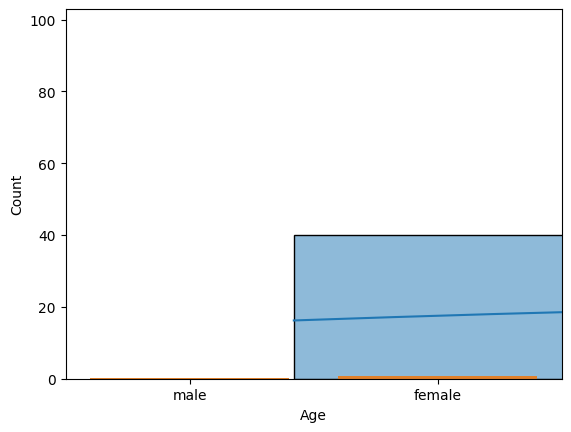

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], kde=True)
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

**Purpose:**

- Reveal patterns **not obvious in tables**
- Example: Younger passengers had slightly higher survival rates

## AI/ML Use Cases

- **Feature selection**: Drop irrelevant or highly correlated features
- **Data cleaning**: Fix missing values before modeling
- **Anomaly detection**: Identify rare cases that may mislead models
- **Prevent data leakage**: Avoid features that give away the target variable

## **Exercises**

Q1. Check missing values in Titanic and impute Age with the median

In [ ]:
print("Missing values before imputation:\n", df.isnull().sum())
df['Age'].fillna(df['Age'].median(), inplace=True)
print("\nMissing values after imputing Age:\n", df.isnull().sum())

Q2. Create histogram of Fare with KDE

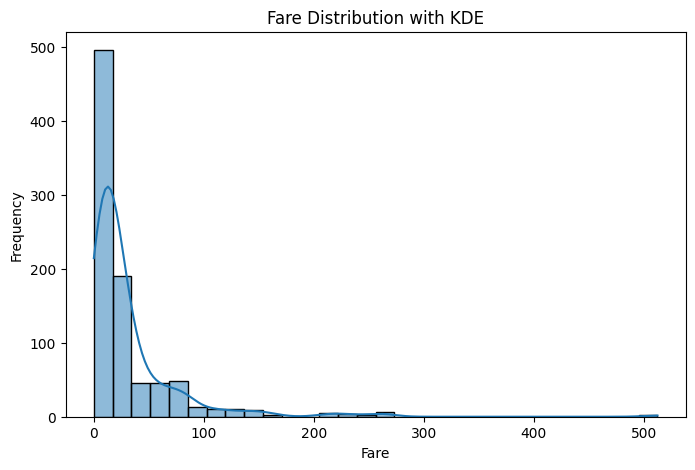

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title("Fare Distribution with KDE")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

Q3.  Compare survival rates by Embarked and Pclass


Survival Rates by Embarked & Pclass:
   Embarked  Pclass  Survived
0        C       1  0.694118
1        C       2  0.529412
2        C       3  0.378788
3        Q       1  0.500000
4        Q       2  0.666667
5        Q       3  0.375000
6        S       1  0.582677
7        S       2  0.463415
8        S       3  0.189802


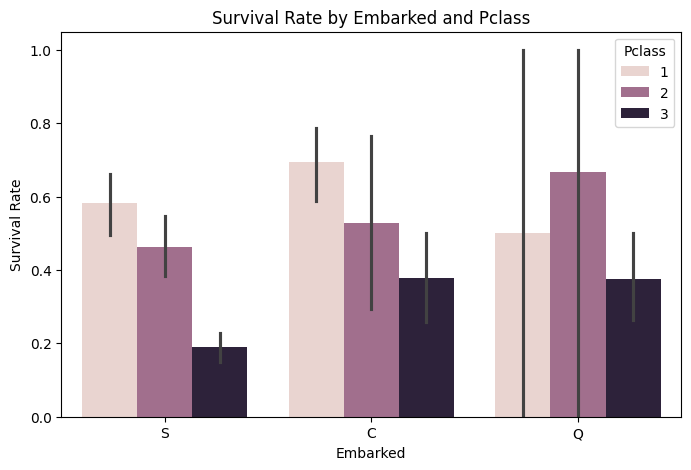

In [9]:
survival_rates = df.groupby(['Embarked', 'Pclass'])['Survived'].mean().reset_index()
print("\nSurvival Rates by Embarked & Pclass:\n", survival_rates)

plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=df)
plt.title("Survival Rate by Embarked and Pclass")
plt.ylabel("Survival Rate")
plt.show()

Q4.  Detect and list outliers in Fare

In [10]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print("\nOutliers in Fare:\n", outliers[['PassengerId', 'Fare']])


Outliers in Fare:
      PassengerId      Fare
1              2   71.2833
27            28  263.0000
31            32  146.5208
34            35   82.1708
52            53   76.7292
..           ...       ...
846          847   69.5500
849          850   89.1042
856          857  164.8667
863          864   69.5500
879          880   83.1583

[116 rows x 2 columns]


### Summary

Exploratory Data Analysis (EDA) is not optional—it serves as the foundation for building any reliable AI/ML model. Using the Titanic dataset, we began by inspecting the data structure to understand the nature, types, and distribution of features. We analyzed individual columns to gain insights into their statistical properties and detect potential anomalies. We then explored relationships between variables, such as how passenger class and embarkation port relate to survival rates. Outlier detection was performed to identify unusual values, particularly in the `Fare` feature, and missing values were addressed, such as imputing the median for the `Age` column. Visualizations like histograms, KDE plots, and heatmaps were used to spot patterns and correlations that are not immediately visible in raw data. Conducting a thorough EDA not only reduces the risk of making poor modeling decisions but also improves feature engineering, helping us identify which variables are most predictive and relevant. Ultimately, EDA ensures that the model is built on clean, accurate, and contextually meaningful data, laying a strong groundwork for successful AI/ML outcomes.